<a href="https://colab.research.google.com/github/ingridapb/MO430/blob/main/Tarefa3/%5B182849%5DTestesEstatisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarefa 3 - Testes Estatísticos**
**MO430**

---

Ingrid Alves de Paiva Barbosa

RA: 182849


In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_bp = pd.read_csv('/content/drive/MyDrive/MO430/datasets/bp.csv') #trocar o caminho do arquivo
dataset_bp

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No
...,...,...
195,58,No
196,68,Yes
197,70,No
198,58,No


In [4]:
dataset_paired = pd.read_csv('/content/drive/MyDrive/MO430/datasets/paired.csv')
dataset_paired

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5
5,Unal,8.3,15.5
6,Columbia_River,18.3,12.7
7,Fritzi_Pauley,13.3,11.1
8,Trichobel,7.9,19.9
9,Gaver,8.1,20.4


# Parte 1

O arquivo bp.csv contem dados sobre a pressão sanguínea (bp) e se a pessoa é ou não diabética (type) (diabetico é type = Yes). Use os seguintes testes e responda os itens abaixo:

- Teste t

- Wilcoxon rank sum


1. Reporte o p-valor da comparação entre a pressão sangüínea de pessoas diabéticas ou não.

In [5]:
bp1 = dataset_bp.loc[(dataset_bp["type"]=="Yes")]
bp2 = dataset_bp.loc[(dataset_bp["type"]=="No")]

stats.ttest_ind(bp1["bp"],bp2["bp"])


Ttest_indResult(statistic=3.001495202122035, pvalue=0.0030323591864622732)

In [6]:
stat, p = stats.ranksums(bp1["bp"],bp2["bp"])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=3.046, p=0.002


Um teste estatístico informa a probabilidade de que os dados sejam tão (ou mais) diferentes quanto eles são tendo em vista que eles vieram da mesma fonte de dados. Esse valor é chamado de p-valor ou p-value

Se a probabilidade é alta então é provável que a diferença que voce encontrou na média (ou outras medidas - mais abaixo) é apenas devido a sorte (ruído de amostragem).

Se a probabilidade é baixa então voce pode dizer que é pouco provável que os dados vieram de uma mesma fonte, ou se a probabilidade é baixa voce pode dizer que é bem provável que os dados realmente vieram de 2 fontes diferentes.

Tradicionalmente, na maioria das Ciências e em particular em Computação usa-se o valor de 0.05 de p-valor para afirmar que a diferença é estatisticamente significante.

Neste caso o p-valor foi de 0.003 pelo t-test e 0.002 pelo Wilcoxon rank sum, então é muito provável que estes dados tenham vindos de fontes diferentes.


2. Qual tem a maior pressão média? E maior pressão mediana?

In [7]:
np.mean(bp1['bp']) # média com diabetes

74.58823529411765

In [8]:
np.mean(bp2['bp']) # média sem diabetes

69.54545454545455

In [9]:
np.median(bp1['bp']) # mediana com diabetes

76.0

In [10]:
np.median(bp2['bp']) # mediana sem diabetes

70.0

A média e a mediana para pessoas com diabetes é apenas um pouco maior do que a média e a mediana para pessoas sem diabetes. Sem o p-valor não seria possível afirmar se a diferença é real ou apenas ruído, mas como temos o p-valor, sabemos que é real.

3. A diferença é significativa?

Como o p-valor ficou bem abaixo de 0.05, sim, a diferença é estatisticamente significante.

4. Discuta a diferença dos p-valores. Quais dos 2 testes você acha mais apropriado nesse caso?

Vamos gerar um histograma para verificar se os dados se assemelham a uma distribuição normal.

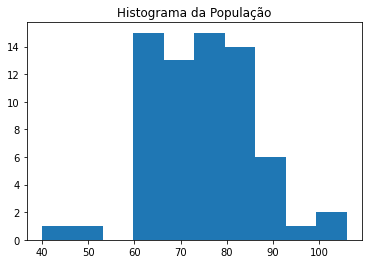

In [11]:
plt.hist(bp1['bp'], bins='auto')
plt.title("Histograma da População")
plt.show()

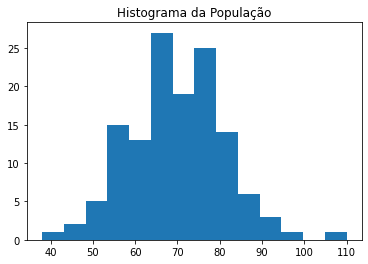

In [12]:
plt.hist(bp2['bp'], bins='auto')
plt.title("Histograma da População")
plt.show()

O conjunto com diabetes não tem distribuição normal, já o conjunto sem diabetes se assemelha á uma distribuição normal. Quando os parâmetros de distribuição não são conhecido, o teste-t não é o mais adequado, por essa razão, neste caso a melhor opção é o teste Wilcoxon rank sums.

# Parte 2

O arquivo paired.csv contém dados sobre duas medições: em Agosto e em Novembro em 13 lugares diferentes.

Use os seguintes testes e responda os itens abaixo:

- Test t pareado

- Wilcoxon signed rank.

1. Qual o mês com maior média e maior mediana?

In [13]:
mean_august = dataset_paired["August"].mean()

mean_august

11.423076923076925

In [14]:
mean_november = dataset_paired["November"].mean()

mean_november

16.323076923076922

In [15]:
median_august = dataset_paired["August"].median()

median_august

10.0

In [16]:
median_november = dataset_paired["November"].median()

median_november

15.3

O mês que possuí a maior média e a maior mediana é Novembro.

2. A diferença é significativa?


In [17]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(dataset_paired["August"], dataset_paired["November"])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-2.309, p=0.040


In [18]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(dataset_paired["August"], dataset_paired["November"])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=16.000, p=0.040


Partindo do princípio que qualquer valor menos que 0.05 é cosiderado significativo, sim, há diferença estatisticamente significativa entre os dois conjuntos de dados (meses de Agosto e Novembro).

3. Discuta a diferença dos p-valores. Quais dos 2 testes você acha mais apropriado nesse caso?

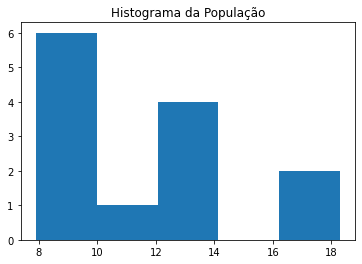

In [19]:
plt.hist(dataset_paired["August"], bins='auto')
plt.title("Histograma da População")
plt.show()

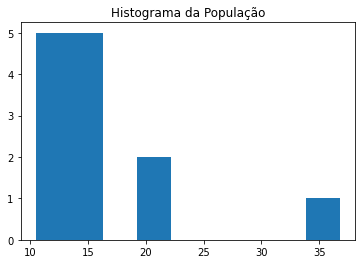

In [20]:
plt.hist(dataset_paired["November"], bins='auto')
plt.title("Histograma da População")
plt.show()

Nenhum dos dois conjuntos de dados possuem distribuição normal, ou seja, ambos são não-paramétricos. Por essa razão, o melhor teste a ser usado é o Wilcoxon signed rank.

# Parte 3

Use os dados (não pareados) do dataset bp.csv

1. Gere o intervalo de confiança para a pressão sangüínea dos pacientes com diabetes e sem diabetes (intervalo de 95% de confiança) usando o método de bootstrap

In [21]:
p1 = (bp1["bp"],) 
bootstrap_ci = stats.bootstrap(p1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=71.77941176470588, high=77.29411764705883)


In [22]:
p2 = (bp2["bp"],) 
bootstrap_ci = stats.bootstrap(p2, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=67.6590909090909, high=71.47727272727273)


2. Teste Visual:  Há intersecção entre os intervalos de confiança dos 2 conjuntos de dados acima (com diabetes e sem diabetes)? Isso está de acordo com o teste de diferença significativa entre eles feito na questão 1?

Não há interseção entre os intervalos de confiança de pessoas com diabetes e sem diabetes. 

Na questão um foi encontrado um p-valor < 0.05. Por essa razão foi considerado que os dois conjuntos de dados (com diabetes e sem diabetes) faziam parte de fontes de dados diferentes. O fato de não haver intersecção entre os conjuntos reforça esta afirmação.

3. Calcule o Cohen D com o pooled standard deviation para a diferença entre a pressão sangüínea de pacientes com e sem diabetes.

In [23]:
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s
 
# calculate cohen's d
d = cohend(bp1["bp"], bp2["bp"])
print('Cohens d: %.3f' % d)

Cohens d: 0.448


4. Com base nos testes, intervalos de confiança, etc realizados acima sobre o dataset bp.csv, qual a sua conclusão sobre pressão arterial em pacientes com ou sem diabetes?

Após todos os testes realizados, a conclusão é que não há relação de dependência entre o valor da pressão arterial e a existência ou não de diabetes. Ou seja, apenas observando apenas o valor da pressão arterial, não é possível afirmar se a pessoa possui ou não diabetes.